### Project Topic:

This project uses unsupervised machine learning to cluster mushroom specimens and identify features correlated with edibility. The dataset (cited below) includes categorical features such as cap shape, cap surface, cap color, bruises, odor, and more. Each row represents a single mushroom, labeled as either edible or poisonous. While the target variable is not used during clustering, it serves to evaluate how well the discovered clusters correspond to true edibility classes. Additionally, supervised learning via Logistic Regression is applied to predict mushroom edibility using labeled data. By comparing the performance and interpretability of both approaches, the project aims to highlight their respective strengths and limitations in analyzing categorical biological data.

The primary models used in this project are Logistic Regression for supervised classification and K-Modes for unsupervised clustering.

### Project Goal
The primary goal of this project is to explore and compare different machine learning approaches for analyzing the Mushroom dataset, focusing on the features of mushroom edibility. Specifically, the project aims to:

- Use Logistic Regression as a supervised method to build an interpretable model for classifying mushrooms based on categorical features.
- Apply K-Modes clustering as an unsupervised technique on categorical data to uncover natural groupings and assess how these correspond to known edibility classes, evaluated with metrics like the Adjusted Rand Index (ARI).

Understanding features of mushroom edibility is critical for public health and safety, as misclassification can lead to severe poisoning. Furthermore, many biological and ecological datasets contain categorical features and often lack comprehensive labels, making unsupervised learning methods valuable for exploratory analysis and feature extraction. Potential applications include developing automated identification tools to assist foragers, educators, and researchers in distinguishing edible species from toxic ones, ultimately reducing the risk of poisoning.

### Data Source(Retrieved From UCI Machine Learning Repository):

This data set was retrieved from the UCI Machine Learning Database and contains  descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family, which are identified as either edible or poisonous.


Citation:
Mushroom [Dataset]. (1981). UCI Machine Learning Repository. https://doi.org/10.24432/C5959T.

In [1]:
#will install requirements for notebook in local jupyter environment
%pip install pandas matplotlib numpy seaborn statsmodels scikit-learn kmodes


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import adjusted_rand_score
from kmodes.kmodes import KModes

### Data Information

The first step of this project was to assess the size of the data set and view the output of the first few rows.

The dataset is a single-table, tabular dataset containing 8,124 rows (samples) and 24 columns (features), including the target variable(Poisonous). It consists of:

- 21 categorical features(cap-shape, cap-surface, cap-color, bruises, odor, gill-attachment, gill-spacing, gill-size, gill-color,
    stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring', stalk-color-below-ring, veil-color, ring-number,
    ring-type, spore-print-color, population, habitat)
- 2 binary categorical features (cap-color, veil-type)
- 1 target variable (Poisonous) with 2 categories - edible or poisonous

Each feature represents physical or biological characteristics of the mushroom.

In [174]:
# Define the column names for the dataset
column_names = [
    'poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

# Load the dataset
data = pd.read_csv('data/mushroom/agaricus-lepiota.data', names=column_names)

#Visualize Data Set Info
print("Data Shape:", data.shape)  # Check the shape of the dataset
print("\nData Info:")
data.info()

# Display the first few rows of the dataset
display(data.head())


Data Shape: (8124, 23)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   o

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Data Cleaning

The Mushroom dataset consists entirely of categorical features, and no true null values were present in this dataset. However, one feature — stalk-root — contained a placeholder value '?' to represent missing data in approximately 30% of the rows. Rather than imputing or removing these rows, the missing indicator was retained and encoded as its own category ('missing'). This decision was made because the models used in this project can natively handle categorical values.

To assess the variability and distribution of feature values, count plots were generated for each feature. This helped visualize more or less common features in the dataset, which may play a role in clustering and classification performance. During this process, the feature veil-type was identified as having a single unique value ('p') across all 8124 entries. Since it provided no variance or predictive value, it was dropped from the dataset prior to model training.

All remaining features were treated as categorical. One-hot encoding was applied where required (e.g., for Logistic Regression), ensuring that each category — including 'missing' — was represented in the model inputs. The target variable class (edible or poisonous) was encoded as a binary(0, 1) outcome for use in supervised classification. Class distribution was nearly balanced, so no resampling methods were necessary.

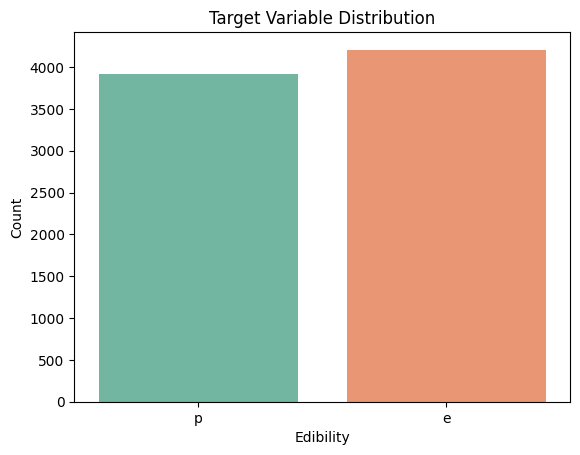

In [175]:
#Visualize the distribution of the target variable for use in Supervised Learning Model
sns.countplot(x='poisonous', hue='poisonous', data=data, palette='Set2', legend=False)
plt.title('Target Variable Distribution')
plt.xlabel('Edibility')
plt.ylabel('Count')
plt.show()


Missing Values Per Feature:
poisonous                      0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


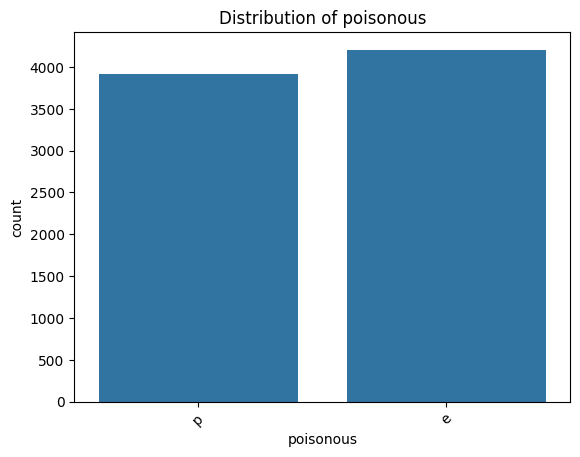

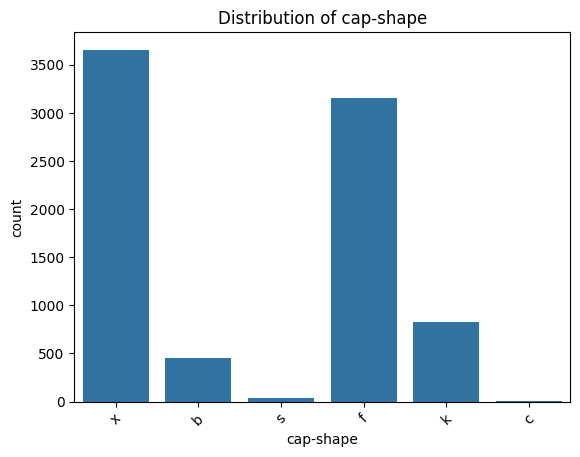

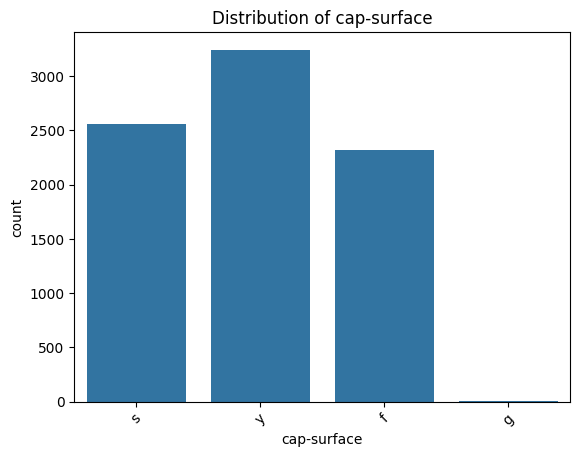

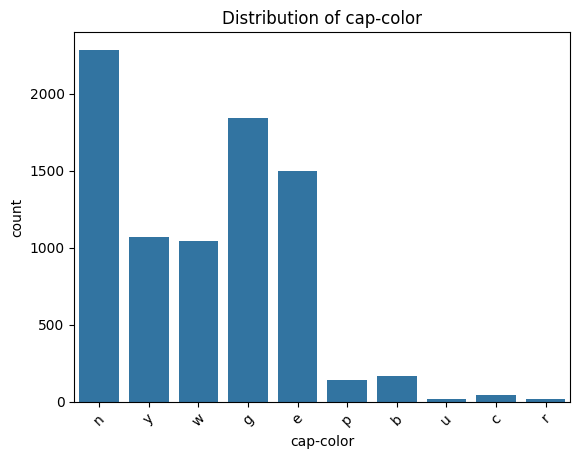

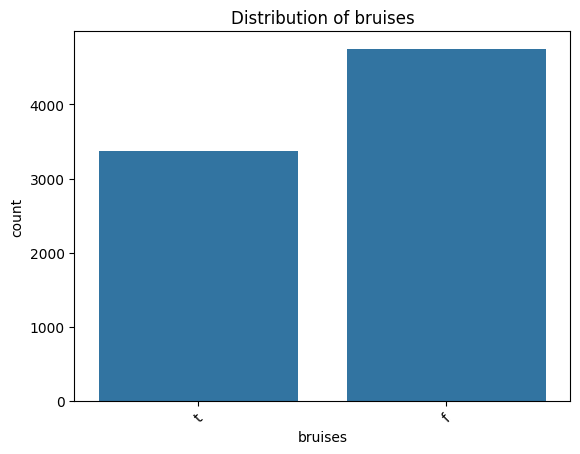

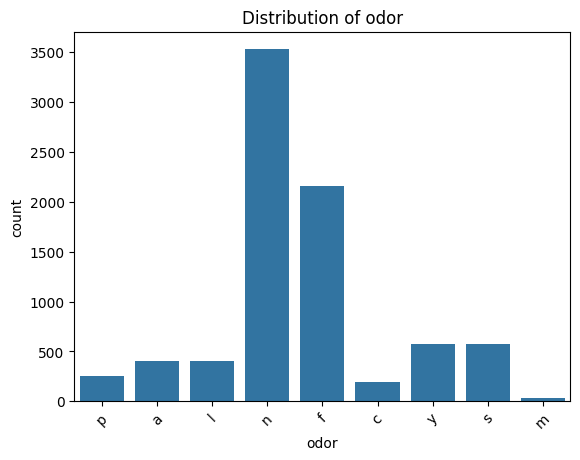

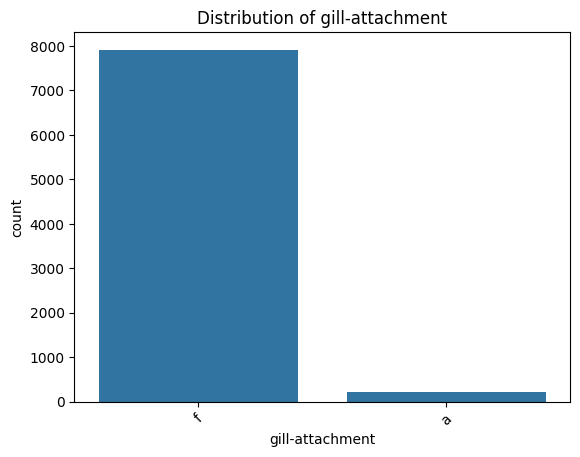

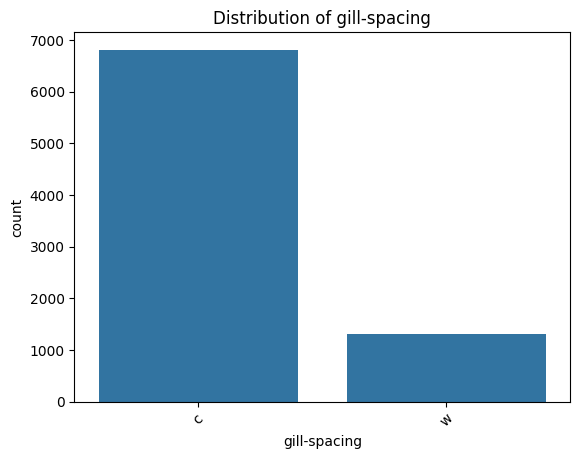

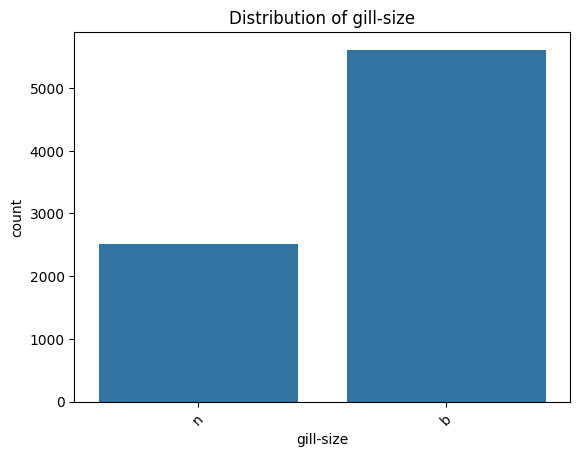

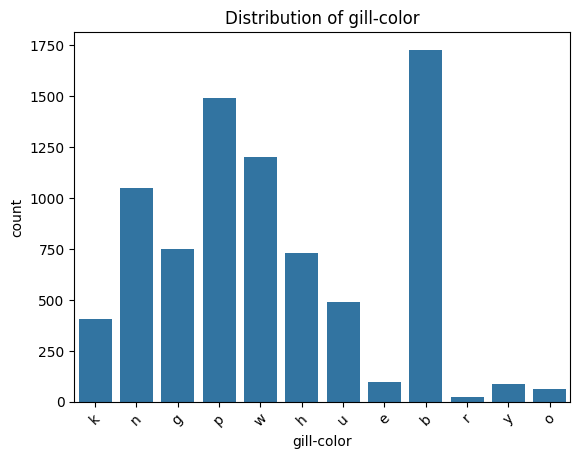

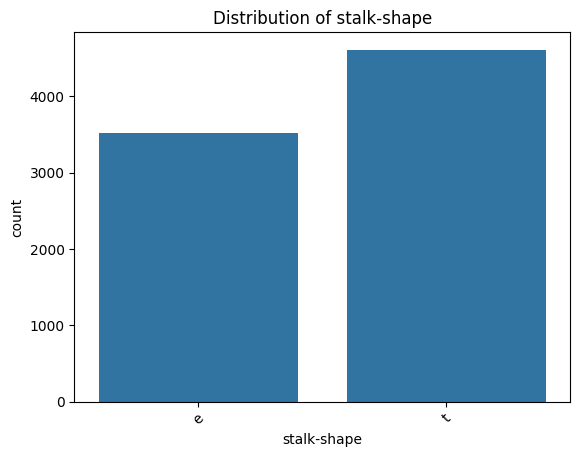

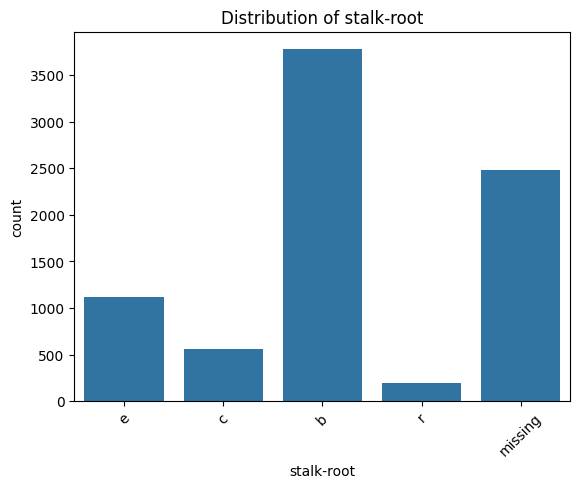

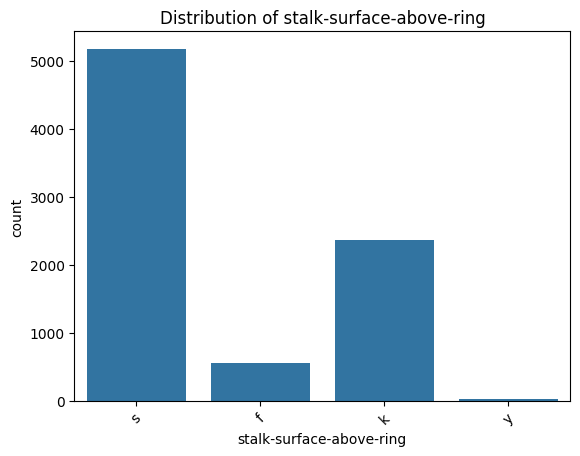

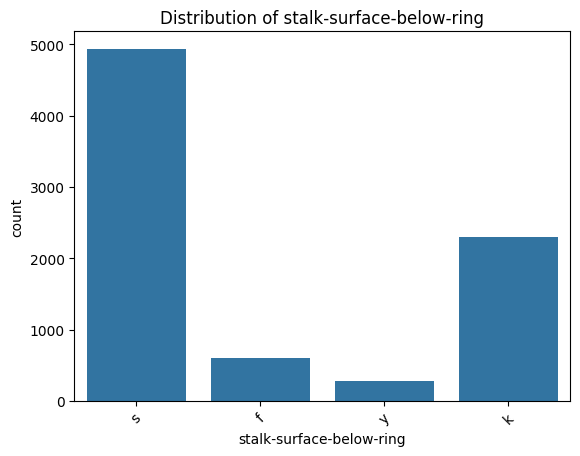

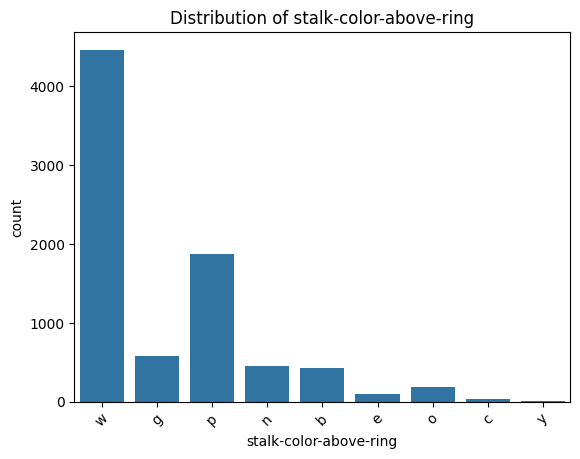

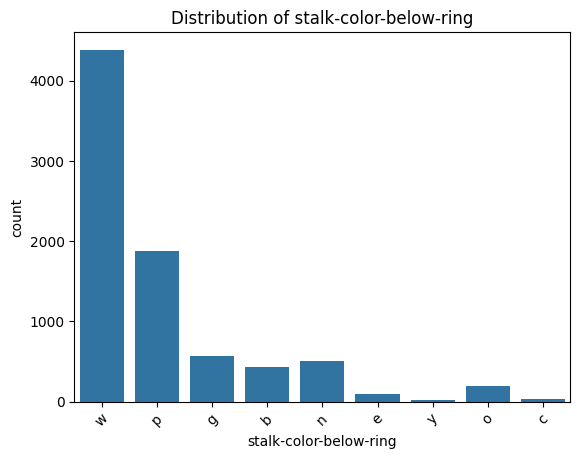

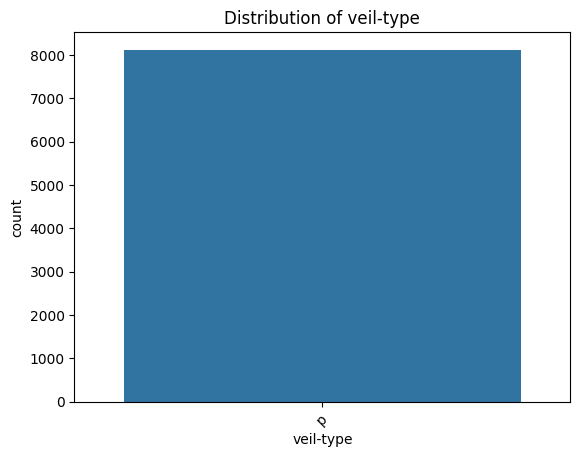

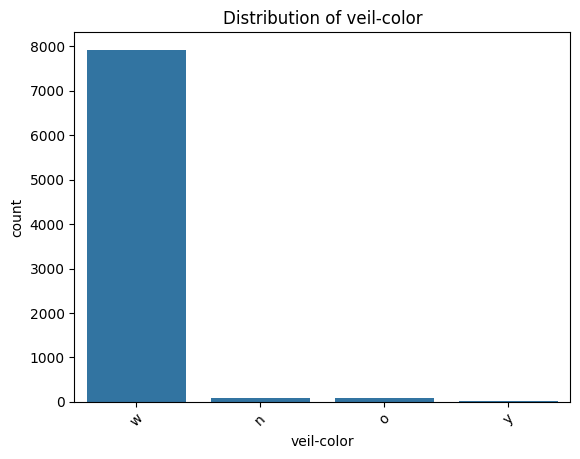

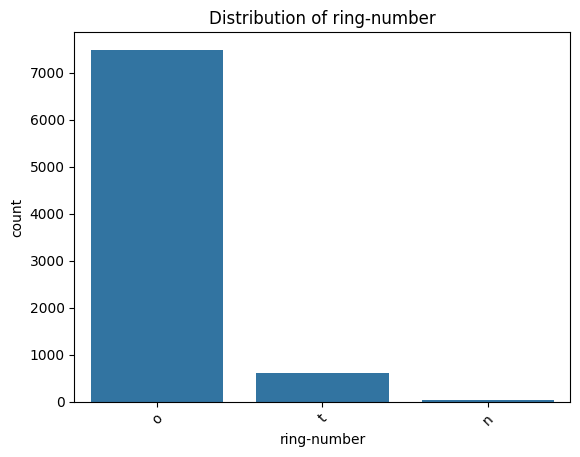

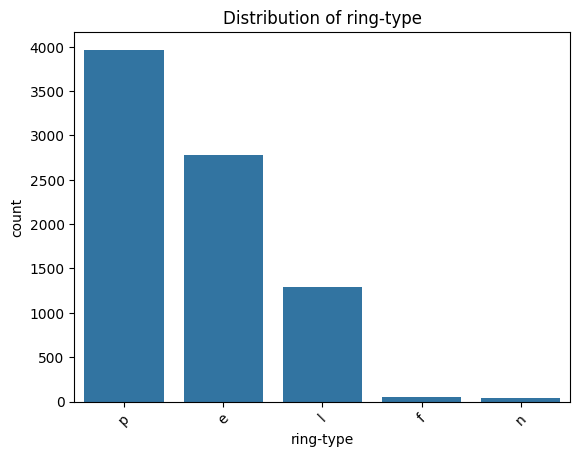

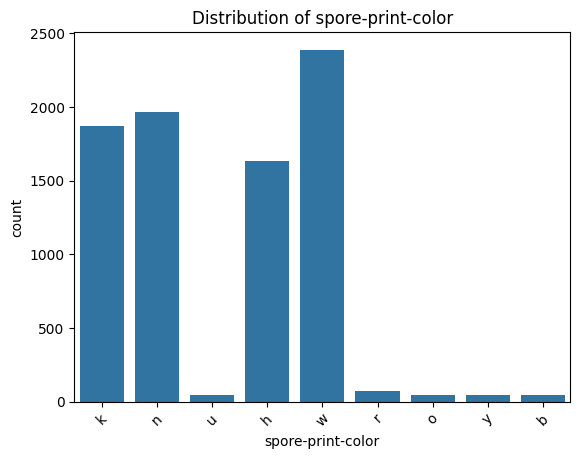

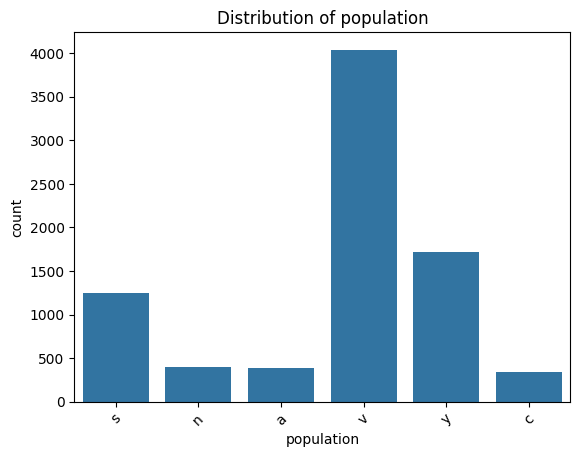

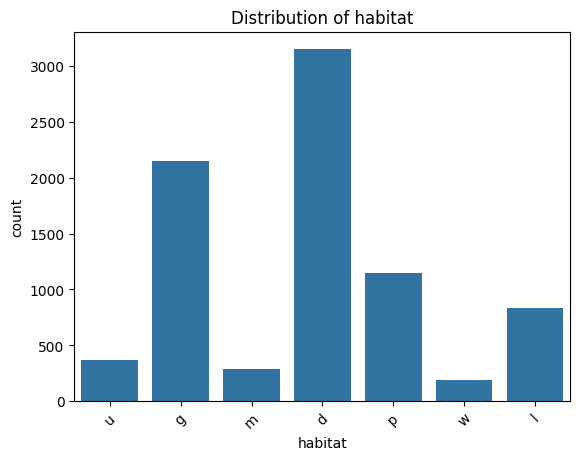

In [176]:
print("\nMissing Values Per Feature:")
print((data == '?').sum())

#replace '?' with 'missing' in the dataset to treat these values as a separate categorical value
data['stalk-root'] = data['stalk-root'].replace('?', 'missing')

for col in data.columns:
        sns.countplot(x=col, data=data)
        plt.xticks(rotation=45)
        plt.title(f"Distribution of {col}")
        plt.show()


In [177]:
# Drop veil-type as it has no variance
data.drop(columns=['veil-type'], inplace=True)


### Exploratory Data Analysis

Assessing the output of the count plots, features such as odor, spore-print-color, and gill-size showed strong class-related skew, suggesting they may be highly informative for both clustering and classification.

To explore the overall structure of the dataset, a t-SNE projection was applied to the one-hot encoded feature space. While not perfectly separated, the projection revealed loosely distinguishable groupings that corresponded to mushroom edibility, indicating meaningful patterns within the feature set.

A ranked bar chart was used to examine the correlation between one-hot encoded features and the target variable. Due to the high dimensionality after encoding, correlation matrix analysis was limited to the top 10 features most strongly correlated with the target class. Both heatmaps and ranked bar charts highlighted strong associations between odor_foul and odor_none to edibility. While some moderate inter-feature correlations were observed (e.g., among gill-related features), none exceeded (r > 0.8), so all features were retained.

These findings suggested that certain features — particularly odor, spore-print-color, and gill characteristics — would likely serve as key predictors of mushroom edibility. This was later confirmed by both logistic regression coefficients and the distinguishing patterns discovered through unsupervised clustering using K-Modes.

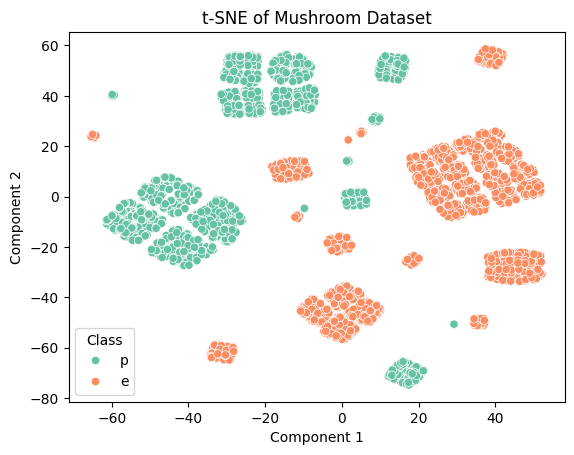

In [ ]:
data['label'] = data['poisonous']  # retain original class labels for plotting

X = data.drop(columns=['poisonous', 'label'])
y = data['poisonous']

# One-hot encode data
X_encoded = pd.get_dummies(X)

# Run t-SNE on encoded data
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_encoded)

# Plot with original labels as hue
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=data['label'], palette='Set2')
plt.title('t-SNE of Mushroom Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Class')
plt.show()

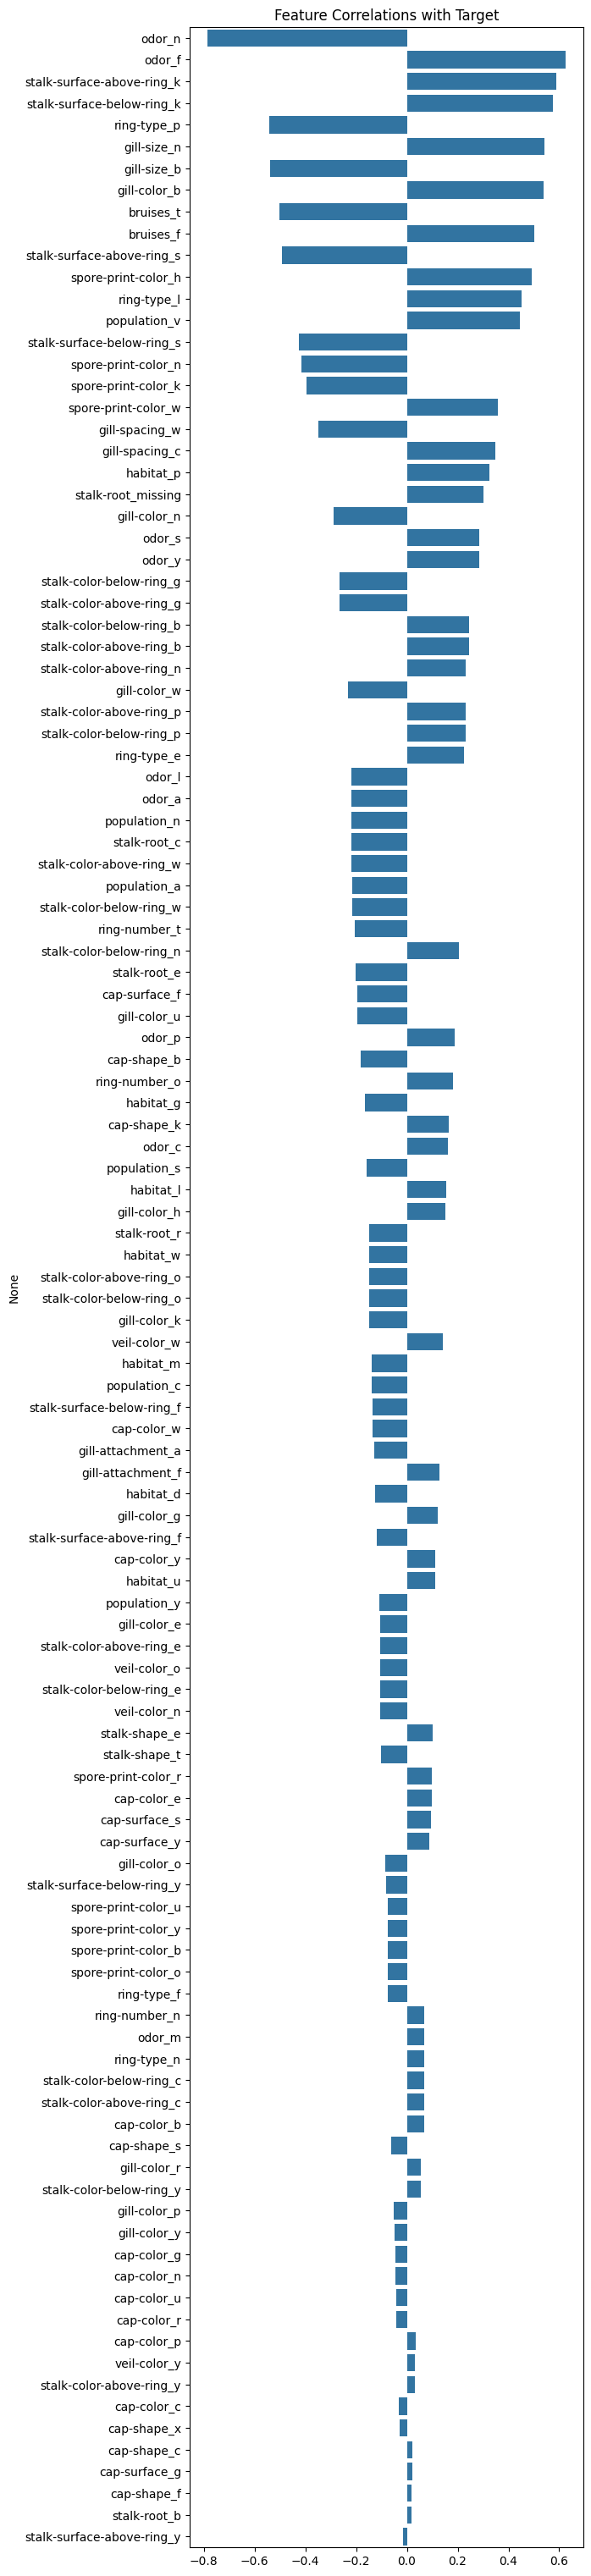

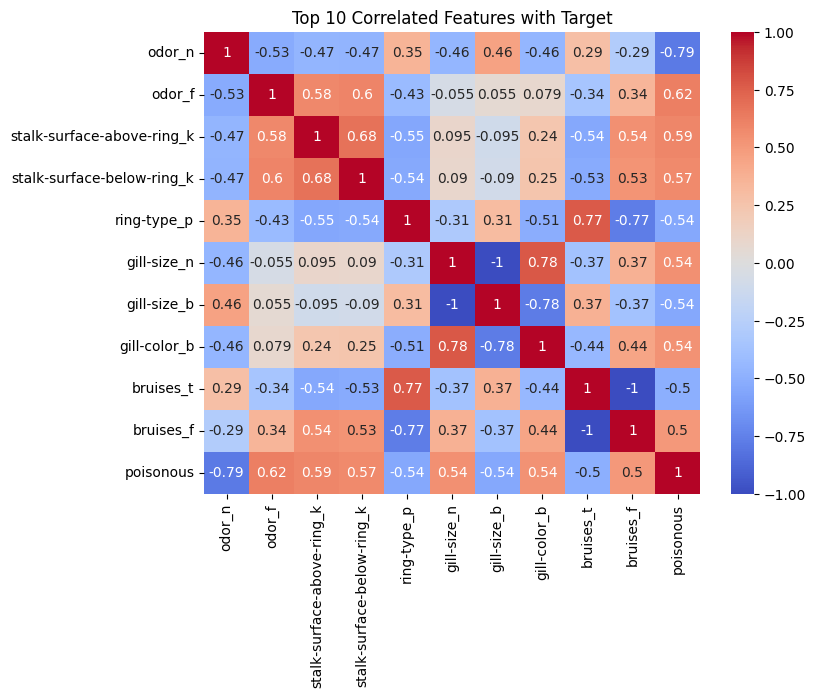

In [189]:
# Map target to binary values
y_binary = y.map({'p': 1, 'e': 0})

# Add mapped target to encoded features DataFrame
data_encoded_with_target = X_encoded.copy()
data_encoded_with_target['poisonous'] = y_binary

# Compute correlation with target
corr_with_target = data_encoded_with_target.corr()['poisonous'].drop('poisonous').sort_values(key=abs, ascending=False)

# Plot bar chart of correlations with target
plt.figure(figsize=(6, len(corr_with_target)/3))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title("Feature Correlations with Target")
plt.show()

# Plot limited heatmap of top 10
top_features = corr_with_target.head(10).index.tolist()
features_to_plot = top_features + ['poisonous']
limited_corr = data_encoded_with_target[features_to_plot].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(limited_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Top 10 Correlated Features with Target")
plt.show()




### Model Procedures
This project utilized both supervised and unsupervised learning approaches to classify mushrooms as edible or poisonous and uncover natural groupings in the data.

#### Logistic Regression (Supervised Learning)

Logistic Regression was chosen for its simplicity and interpretability in binary classification tasks. The model was trained on a one-hot encoded version of the categorical dataset. To assess generalization, 5-fold cross-validation was performed.

Hyperparameter tuning using GridSearchCV explored a range of regularization strengths (C) and solvers. However, the tuned model yielded similar results to the default configuration, indicating there may be clear patterns in the dataset that reliably indicate whether a mushroom is poisonous or edible.

#### K-Modes Clustering (Unsupervised Learning)

K-Modes Clustering—a method suitable for categorical data—was applied to the categorical features. Unlike k-means, K-Modes groups observations based on shared attribute modes.

Hyperparameter tuning was conducted over:

- Initialization methods (Huang vs. Cao)
- Number of initializations (n_init)

The best clustering emerged with 2 clusters, aligning with the binary nature of the classification problem. Evaluation using the Adjusted Rand Index (ARI), which quantifies similarity to true labels while correcting for chance.

#### Model Visualization and Interpretation

- Logistic Regression: Coefficient magnitudes were used to assess feature importance.
- K-Modes Clustering: Cluster profiles were examined by extracting the most frequent (mode) values per feature within each cluster, revealing distinguishing traits for edible vs. poisonous mushrooms.
- t-SNE Visualization: A 2D t-SNE embedding was used to visualize the dataset, with clusters overlaid.

#### Overfitting and Class Imbalance Handling

- No signficant class imbalance was observed; the dataset had a relatively even split between edible and poisonous mushrooms.
- Overfitting was mitigated through cross-validation and regularization.
- K-Modes, being unsupervised, did not directly require balancing strategies.

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_binary, test_size=0.2, random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

#Build and tune Logistic Regression model
model = LogisticRegression()
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Val Score:", grid.best_score_)

# Evaluate on best parameters
clf = LogisticRegression(**grid.best_params_)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Perform cross-validation
cross_val_scores = cross_val_score(clf, X_encoded, y_binary, cv=5)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())


Best Parameters: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Val Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Accuracy: 1.0
Cross-Validation Scores: [0.95138462 1.         0.98646154 1.         0.66317734]
Mean Cross-Validation Score: 0.9202046987495264


Top 10 features by coefficient values:
odor_n                -3.964502
spore-print-color_r    3.374125
odor_f                 2.770810
odor_l                -2.638148
odor_a                -2.632291
odor_c                 2.563838
stalk-root_b           2.493439
gill-size_n            2.291117
gill-size_b           -2.224136
odor_p                 2.071522
dtype: float64


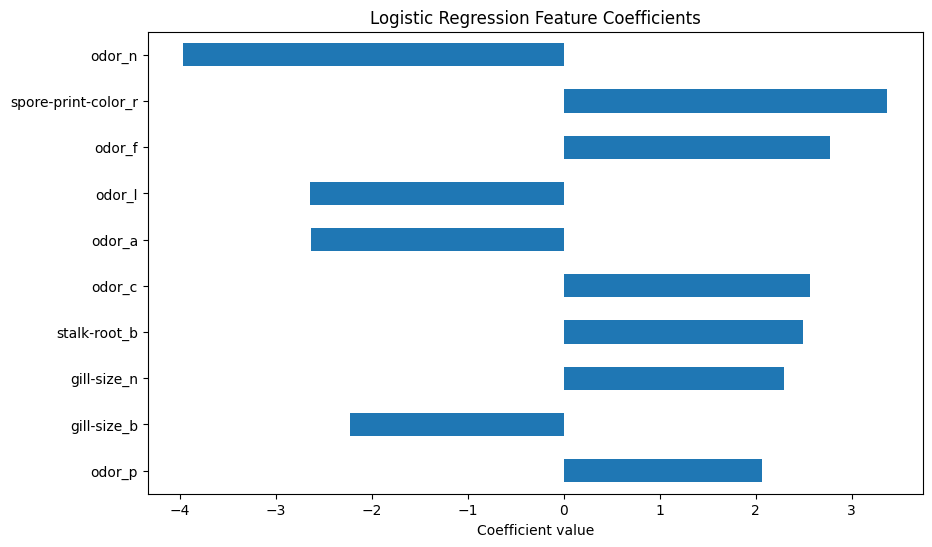

In [191]:
feature_names = X_encoded.columns

# Get coefficients from the logistic regression model
coef = clf.coef_[0]

# Create a Series for coefficients with feature names
coef_series = pd.Series(coef, index=feature_names)

# Sort coefficients by absolute value
coef_sorted = coef_series.reindex(coef_series.abs().sort_values(ascending=False).index)
print("Top 10 features by coefficient values:")
print(coef_sorted.head(10))

# Plot top 10 features by magnitude
plt.figure(figsize=(10,6))
coef_sorted.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Logistic Regression Feature Coefficients")
plt.xlabel("Coefficient value")
plt.show()

In [ ]:
# Use original categorical data
X_categorical = X.copy()

# Hyperparameter tuning with different initialization methods and number of initializations
inits = ['Huang', 'Cao', 'random']
n_inits = [5, 10, 20]

best_ari = -1
best_params = {}
cluster_results = {}

for init_method in inits:
    for n_init in n_inits:
        # Fit K-Modes clustering with parameters(always use 2 clusters for edible vs poisonous)
        km = KModes(n_clusters=2, init=init_method, n_init=n_init, random_state=42)
        clusters = km.fit_predict(X_categorical)
        ari = adjusted_rand_score(y, clusters)
        cluster_results[(init_method, n_init)] = {
            'clusters': clusters,
            'cost': km.cost_,
            'ari': ari
        }
        print(f"Init: {init_method}, n_init: {n_init}, Cost: {km.cost_}, ARI: {ari:.4f}")

# Find best params and ARI score
best_key = max(cluster_results, key=lambda k: cluster_results[k]['ari'])
best_clusters = cluster_results[best_key]['clusters']
print("Best params:", best_key)
print("Best ARI:", cluster_results[best_key]['ari'])

Init: Huang, n_init: 5, Cost: 62534.0, ARI: 0.5891
Init: Huang, n_init: 10, Cost: 62534.0, ARI: 0.5891
Init: Huang, n_init: 20, Cost: 62534.0, ARI: 0.5891
Init: Cao, n_init: 5, Cost: 62644.0, ARI: 0.5637
Init: Cao, n_init: 10, Cost: 62644.0, ARI: 0.5637
Init: Cao, n_init: 20, Cost: 62644.0, ARI: 0.5637
Init: random, n_init: 5, Cost: 62474.0, ARI: 0.6120
Init: random, n_init: 10, Cost: 62474.0, ARI: 0.6120
Init: random, n_init: 20, Cost: 62474.0, ARI: 0.6120
Best params: ('random', 5)
Best ARI: 0.6120381812669357



Cluster 0 (size: 3168) key distinguishing traits:
  cap-shape: f
  odor: f
  gill-size: n
  stalk-root: missing
  stalk-surface-above-ring: k
  stalk-surface-below-ring: k
  stalk-color-above-ring: p
  stalk-color-below-ring: p
  ring-type: e
  Label distribution:
true_label
p    0.978535
e    0.021465
Name: proportion, dtype: float64

Cluster 1 (size: 4956) key distinguishing traits:
  cap-surface: s
  bruises: t
  gill-color: w
  spore-print-color: n
  Label distribution:
true_label
e    0.835351
p    0.164649
Name: proportion, dtype: float64


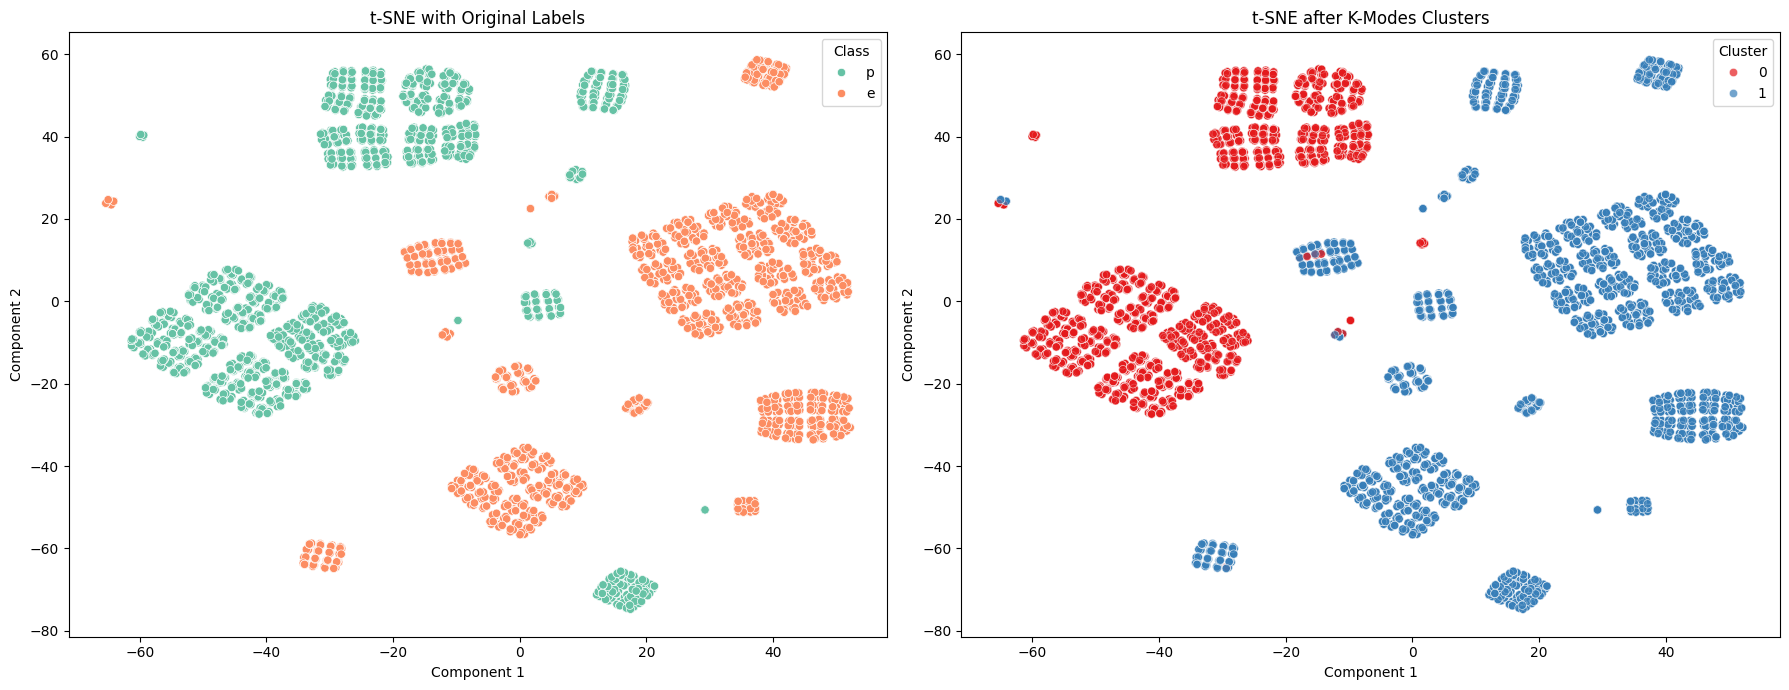

In [ ]:
# Best_clusters from tuned K-Modes results
df_clusters = X_categorical.copy()
df_clusters['cluster'] = best_clusters
df_clusters['true_label'] = y  # original target: 'p' or 'e'

# Calculate overall mode for each feature (exclude cluster and true_label)
overall_mode = df_clusters.drop(columns=['cluster', 'true_label']).mode().iloc[0]

#Display distinguishing traits for each cluster
for cluster_label in sorted(df_clusters['cluster'].unique()):
    cluster_data = df_clusters[df_clusters['cluster'] == cluster_label]
    size = len(cluster_data)
    cluster_mode = cluster_data.mode().iloc[0]

    print(f"\nCluster {cluster_label} (size: {size}) key distinguishing traits:")
    distinguishing = [(feat, val) for feat, val in cluster_mode.items()
                     if feat not in ['cluster', 'true_label'] and val != overall_mode[feat]]

    for feature, val in distinguishing:
        print(f"  {feature}: {val}")

    label_counts = cluster_data['true_label'].value_counts(normalize=True)
    print(f"  Label distribution:\n{label_counts}")


# Visualize clusters and original labels on t-SNE embedding side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot original labels on the left
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1],
    hue=data['label'], palette='Set2', legend='full', ax=axes[0])
axes[0].set_title('t-SNE with Original Labels')
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')
axes[0].legend(title='Class')

# Plot tsne after KModes clustering on the right
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1],
    hue=best_clusters, palette='Set1', legend='full', alpha=0.7, ax=axes[1])
axes[1].set_title('t-SNE after K-Modes Clusters')
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')
axes[1].legend(title='Cluster')

plt.tight_layout()
plt.show()



### Summary of Results and Analysis
This project employed both supervised and unsupervised learning methods to classify mushroom edibility and explore natural groupings within the categorical feature space. Two distinct modeling approaches—Logistic Regression and K-Modes Clustering—were compared to evaluate predictive accuracy, feature relevance, and the presence of latent structure in the data.

#### Logistic Regression

- The logistic regression model achieved 100% accuracy on the test set and a mean cross-validation score of approximately 92%, indicating strong generalization performance.
- Based on model coefficients, the top predictors of edibility included odor_n (none), spore-print-color_r(green), and odor_f (foul), which are biologically plausible markers of mushroom toxicity.

#### K-Modes Clustering
K-Modes, an unsupervised algorithm tailored for categorical data, was used to uncover intrinsic groupings based on shared attribute modes, independent of class labels.

- Cluster 0 (n = 3,168): Strongly aligned with poisonous mushrooms (97.8% of samples). This cluster was defined by traits such as foul odor, narrow gill size, pink stalk surface both above and below the ring, and silky surface above and below the ring. Foul odor and narrow gills also had strong positive coefficients in the supervised logistic regression model, indicating consistency across modeling approaches.

- Cluster 1 (n = 4,956): Comprised primarily of edible mushrooms (83.5%). Key traits included smooth cap surface, presence of bruises, white gill color, and brown spore-print color. Compared to Cluster 0, this group displayed less distinctive features, which may explain its lower purity. This may indicate that edible mushroom traits are more varied, making them harder to isolate in an unsupervised setting.

The balanced cluster sizes and high class purity suggest K-Modes captured meaningful structure, supported by clearer edible–poisonous separation in the post-clustering t-SNE projection.

#### Visual Interpretations

- A bar chart of logistic regression coefficients highlighted the most influential predictors of edibility, providing clear, interpretable insights into the model’s decision-making process.

- A side-by-side t-SNE visualization before and after clustering demonstrated improved separation of samples post-clustering, indicating that K-Modes clustering helped uncover natural groupings within the data that better align with the true edible vs. poisonous classes. This visual evidence also supports the increase in the ARI score, showing that clustering reduced overlap and enhanced cluster cohesion when compared to the initial dataset.


### Discussion and Conclusion:

This project explored mushroom edibility classification using both supervised and unsupervised learning. Logistic Regression provided a strong, interpretable baseline, achieving 100% test accuracy and a mean cross-validation score of 92%. Its feature coefficients clearly highlighted biologically meaningful predictors, such as odor and gill size, confirming strong, separable signals in the data.

K-Modes clustering revealed meaningful structuresnin the dataset, achieving an Adjusted Rand Index (ARI) of 0.61. While not as precise as the supervised model, the clusters aligned well with edibility:

- Cluster 0, composed mostly of poisonous mushrooms (~97.9%), showed traits like foul odor and narrow gills—features that also appeared among the top logistic regression coefficients.
- Cluster 1, mostly edible (~83.5%), exhibited less distinctive traits, reinforcing that edible mushrooms are more diverse and harder to isolate through clustering or classification alone.

These findings support the idea that poisonous mushrooms have more clear, consistent indicators, while edible mushrooms present greater variability.

Visualizations such as logistic regression coefficient bar plots and side-by-side t-SNE projections supported these conclusions by highlighting both feature importance and improved separation post-clustering.

#### Areas for Improvement

- Address variability in cross-validation scores (e.g., one fold dropped to ~66%) by exploring sampling strategies or more robust validation.
- Enhance model generalization through regularization, feature engineering, or dimensionality reduction.
- Consider alternative classifiers or ensemble approaches to improve robustness.
- Improve clustering performance by combining K-Modes with dimensionality reduction (e.g., MCA or categorical PCA).
- Validate model scalability on larger or more diverse datasets.

In summary, logistic regression proved highly accurate and interpretable for supervised classification, while K-Modes clustering offered useful insights into natural groupings in the data. Together, they provide a comprehensive view of mushroom edibility — balancing predictive power with unsupervised pattern discovery.